In [44]:
import time
import hashlib
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from IPython import display
import ipywidgets as widgets
import tqdm.notebook as tqdm


%matplotlib inline
fig=plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

In [45]:
def do_simple_plot():
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2 * np.pi * t)

    fig, ax = plt.subplots()
    ax.plot(t, t**2)

    ax.set(xlabel='time (s)', ylabel='voltage (mV)',
           title='About as simple as it gets, folks')
    ax.grid()
    plt.show()
    return fig

In [46]:
data = pd.DataFrame(columns=['uid', 'data', 'label', 'labeler name'])
for n in range(10):
    data_uid = hashlib.sha1(bytes(n)).hexdigest()
    data.loc[len(data)] = [data_uid, n, None, None]
data.loc[3, 'label']= 1

In [47]:
print(data)

                                        uid  data label labeler name
0  da39a3ee5e6b4b0d3255bfef95601890afd80709     0  None         None
1  5ba93c9db0cff93f52b521d7420e43f6eda2784f     1  None         None
2  1489f923c4dca729178b3e3233458550d8dddf29     2  None         None
3  29e2dcfbb16f63bb0254df7585a15bb6fb5e927d     3     1         None
4  9069ca78e7450a285173431b3e52c5c25299e473     4  None         None
5  a10909c2cdcaf5adb7e6b092a4faba558b62bd96     5  None         None
6  7722745105e9e02e8f1aaf17f7b3aac5c56cd805     6  None         None
7  77ce0377defbd11b77b1f4ad54ca40ea5ef28490     7  None         None
8  05fe405753166f125559e7c9ac558654f107c7e9     8  None         None
9  c259e771b237769cb6bce9a5ab734c576a6da3e1     9  None         None


In [116]:
labels = {
    0: "Not Cloudy",
    1: "Cloudy"
}


def get_valid_label_str(valid_labels):
    s = ""
    for key, val in labels.items():
        s += f"{key + 1}='{val}', "
    return s[:-2]


def get_label_session(df, labler_name):
    unlabeled_data = df[df.label.isnull()]
    valid_label_str = get_valid_label_str(labels)
    
    def label_session():
        num_imgs = len(unlabeled_data)
        for i in range(num_imgs):
            display.clear_output(wait=True)
            bar = tqdm.tqdm(initial=i, total=num_imgs, unit="img")
            fig = do_simple_plot()
            
            valid_label = False
            while not valid_label:
                label = input(f"Valid labels:\t{valid_label_str}.\nYour label: ")
                if label.isnumeric() and int(label) - 1 in labels:
                    valid_label = True
                elif label == 'exit':
                    return
                else:
                    print(f"\x1b[31mError:\t    '{label}' -->  is not one of the valid labels.\
                          \nTo exit the session, type 'exit'.\x1b[0m\n")
                    time.sleep(0.5)
        bar.update()
    return label_session
#labeler(df)

In [122]:
# Enter your name below, then run this cell
name = "Nicolas Rault-Wang"
label_session = get_label_session(data, name)

 89%|########8 | 8/9 [00:00<?, ?img/s]

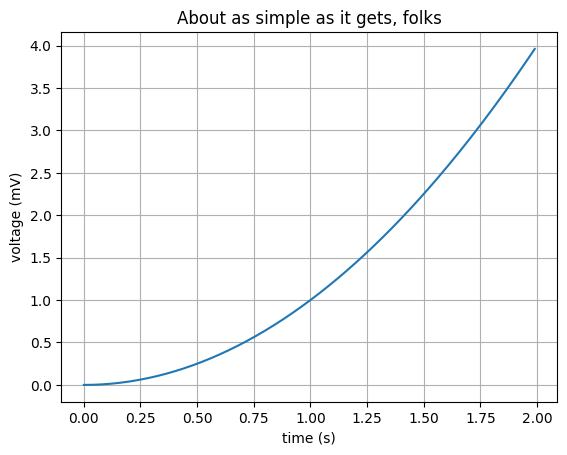

Valid labels:	1='Not Cloudy', 2='Cloudy'.
Your label:  1


"red"


In [123]:
# Run this cell to start labeling
label_session()